# FINAL PROJECT

Người thực hiện

    Họ tên: Nguyễn Đình Tuyên. MSSV: 1712888

    Họ tên: Đặng Đỗ Huỳnh Như. MSSV: 18120219

## Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Thu thập dữ liệu

- Dữ liệu trong file "data_scientist_salary.csv" được lấy trên kaggle mô tả về mức lương của nhà khoa học dữ liệu tại các bang của nước Mỹ. 

- License của dữ liệu là CC0: Public domain. Do đó, dữ liệu cho phép sử dụng.

- Dữ liệu được thu thập từ trang web GlassDoor bằng cách sử dụng trình quét Selenium.

## 2. Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
ds_salary_df = pd.read_csv('data_scientist_salary.csv')
ds_salary_df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


- Bỏ cột **index**, sử dụng theo index của pandas, vì theo quan sát ta thấy cột này chỉ chỉ mục của dòng nhưng lại không liên tục.

In [3]:
ds_salary_df = ds_salary_df.drop(columns = ['index'])

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

- Biến num_rows và num_columns chỉ số dòng và số cột của dữ liệu

In [4]:
num_rows = len(ds_salary_df)
num_columns = len(ds_salary_df.columns)
num_rows, num_columns

(742, 41)

- Dữ liệu có 742 dòng và 42 cột

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Mỗi dòng có thông tin về mức lương tối thiểu, mức lương tối đa, mô tả về công việc, công ty,... liên quan đến nhà khoa học dữ liệu. Theo quan sát sơ bộ và mô tả về dữ liệu thì không có dòng nào có ý nghĩa khác.

### Dữ liệu có các dòng bị lặp không?

- Biến duplicated_rows dùng để kiểm tra có dòng lặp hay không bằng phương thức duplicated của pandas, trả về True nếu bị lặp, ngược lại là False.

In [5]:
duplicated_rows = ds_salary_df.duplicated().any()
duplicated_rows

True

- Do dữ liệu có dòng bị lặp nên mình tiến hành loại bỏ các dòng bị lặp, chỉ giữ lại dòng đầu tiên.

In [6]:
ds_salary_df = ds_salary_df.drop_duplicates()
ds_salary_df.shape

(467, 41)

### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả về các cột trong file "data_scientist_salary":
- **Job title**: Chức danh của công việc, ví dụ: Data scientist, junior data scientist, senior data scientist, ...
- **Salary Estimate**: Khoảng lương và nguồn lấy thông tin.
- **Job Description**: Mô tả chung về công việc, cho biết các yêu cầu kỹ năng mà công ty mong muốn và những việc mà người trúng tuyển sẽ đảm nhiệm.
- **Rating**: Điểm đánh giá cho công ty.
- **Company Name**: Tên công ty.
- **Location**: Địa điểm làm việc.
- **Headquarters**: Địa điểm trụ sở chính của công ty.
- **Size**: Quy mô nhân lực của công ty.
- **Founded**: Năm thành lập công ty. 
- **Type of ownership**: Cho biết đây là công ty tư nhân, đại chúng hay thuộc nhà nước. 
- **Industry**: Cho biết hoạt động kinh doanh của công ty thuộc ngành công nghiệp nào, ví dụ: công nghệ thông tin, công nghiệp dược phẩm, ... 
- **Sector**: Lĩnh vực mà công ty hoạt động.
- **Revenue**: Tổng số doanh thu hàng năm của công ty. 
- **Competitors**: Cho biết những đối thủ cạnh tranh hiện tại của công ty. 
- **Hourly**: Có giá trị 1 nếu mức lương được báo cáo theo giờ và có giá trị là 0 ở các trường hợp còn lại.
- **Employer provided**: Có giá trị là 1 nếu mức lương được cung cấp bởi nhà tuyển dụng và có giá trị là 0 ở các trường hợp còn lại.
- **Lower Salary**: Mức lương tối thiểu cho công việc này của công ty.
- **Upper Salary**: Mức lương tối đa cho công việc này của công ty.
- **Avg Salary(K)**: Mức lương trung bình cho công việc này của công ty.
- **company_txt**: Chứa tên công ty.
- **Job Location**: Tên viết tắt của vị trí công ty (bang).
- **Age**: Tuổi của công ty (tính theo năm).
- **Python -> google_an**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng ..., ngược lại có giá trị 0.
- **job_title_sim**: Tên đơn giản của chức danh công việc.
- **seniority_by_title**: Có chữ senior trong chức danh.
- **Degree**: Có giá trị M nếu công việc yêu cầu bằng cấp hoặc số năm kinh nghiệm; có giá trị P trong các trường hợp còn lại.

**Nhận xét**
- Ở đây có quá nhiều cột dữ liệu, vì vậy để dễ dàng theo dõi và nhận xét thì ta sẽ bỏ bớt các cột không cần thiết ví dụ như:
    - Bỏ các cột có thông tin ngoài lề như: **Headquarters**(vị trí trụ sở), **Competitors**(Đối thủ cạnh tranh của cty), **Hourly**(lương theo giờ hay không), **Employer provided**(thông tin do nhân viên cung cấp hay không).
    - Bỏ cột trùng dữ liệu: **company_txt**(tên của công ty) trùng với Company Name.

In [7]:
ds_salary_df = ds_salary_df.drop(columns = ['Headquarters','Competitors','Hourly', \
                                            'Employer provided','company_txt'])
ds_salary_df.shape

(467, 36)

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

- Dùng chức năng dtypes để xem kiểu dữ liệu của các cột.

In [8]:
col_dtypes = ds_salary_df.dtypes
col_dtypes

Job Title              object
Salary Estimate        object
Job Description        object
Rating                float64
Company Name           object
Location               object
Size                   object
Founded                 int64
Type of ownership      object
Industry               object
Sector                 object
Revenue                object
Lower Salary            int64
Upper Salary            int64
Avg Salary(K)         float64
Job Location           object
Age                     int64
Python                  int64
spark                   int64
aws                     int64
excel                   int64
sql                     int64
sas                     int64
keras                   int64
pytorch                 int64
scikit                  int64
tensor                  int64
hadoop                  int64
tableau                 int64
bi                      int64
flink                   int64
mongo                   int64
google_an               int64
job_title_

- Các cột có kiểu dữ liệu đã phù hợp ngoại trừ cột **Founded**: dùng để chỉ năm thành lập của công ty, nên chuyển thành datetime với format là '%Y'.
- Tuy nhiên khi xử lý sẽ gặp lỗi bởi vì các giá trị thiếu được điền là '-1'. Vì vậy để dễ xử lý ta cần thay đổi các giá trị '-1' thành np.NaN.

In [9]:
ds_salary_df = ds_salary_df.replace(-1, np.NaN)
ds_salary_df['Founded'] = pd.to_datetime(ds_salary_df['Founded'],format = '%Y')
ds_salary_df['Founded'].head()

0   1973-01-01
1   1984-01-01
2   2010-01-01
3   1965-01-01
4   1998-01-01
Name: Founded, dtype: datetime64[ns]

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?
(tính tỉ lệ các giá trị thiếu, min/max của các cột có kiểu dữ liệu dạng số)

Vì các cột từ Python -> google_an: chỉ gồm 1 nếu công việc yêu cầu skill này hoặc ngược lại là 0 cho nên ta không cần xét sự phân bố các cột này. Các cột có kiểu dữ liệu dạng số (numerical) cần xét còn lại là: **"Rating", "Lower Salary", "Upper Salary", "Avg Salary(K)", "Age"**. 

Với mỗi cột này ta tính phần trăm các giá trị thiếu, min, max bằng cách dùng cấu trúc agg để tổng hợp các tính năng tính giá trị trong mỗi cột.

In [10]:
numerical_df = ds_salary_df[["Rating", "Lower Salary", "Upper Salary", "Avg Salary(K)", "Age"]]
def missing_ratio(x):
    return x.isna().mean() * 100

numerical_df = numerical_df.agg([missing_ratio, pd.Series.min, pd.Series.max])
numerical_df

,Rating,Lower Salary,Upper Salary,Avg Salary(K),Age
missing_ratio,1.498929,0.0,0.0,0.0,7.066381
min,1.900000,15.0,16.0,15.5,2.000000
max,5.000000,202.0,306.0,254.0,277.000000


- Ta có thể thấy min/max các cột không có gì bất thường, ngoại trừ Age của 1 công ty có tuổi '277'?

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?
(tính tỉ lệ các giá trị thiếu, số lượng các giá trị khác nhau, show một vài giá trị)

Theo như quan sát và tìm hiểu dữ liệu thì các cột categorical của dữ liệu trên sẽ là các cột có dtypes là object.

Tuy nhiên: 
- Ở các cột **seniority_by_title**, **Degree** thì các giá trị thiếu được điền là na -> cần chuyển thành np.NaN để có thể hoạt động tốt trên các hàm của pandas.
- Ở cột **Revenue** thì các giá trị thiếu được điền là Unknown -> cần chuyển thành np.NaN

In [11]:
ds_salary_df = ds_salary_df.replace(['na', 'Unknown / Non-Applicable'], np.NaN)

In [12]:
columns_cate = list(ds_salary_df.dtypes[ds_salary_df.dtypes == 'object'].index)
categorical_df = ds_salary_df[columns_cate]
def diff_vals(s):
    return s.dropna().unique()
def num_diff_vals(s):
    return s.nunique()
categorical_df = categorical_df.agg([missing_ratio,num_diff_vals,diff_vals])
categorical_df

,Job Title,Salary Estimate,Job Description,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,Job Location,job_title_sim,seniority_by_title,Degree
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.69379,0.0,1.284797,72.805139,52.462527
num_diff_vals,264,416,463,343,200,8,9,60,25,12,37,9,2,2
diff_vals,"[Data Scientist, Healthcare Data Scientist, Re...","[$53K-$91K (Glassdoor est.), $63K-$112K (Glass...","[Data Scientist\nLocation: Albuquerque, NM\nEd...","[Tecolote Research\n3.8, University of Marylan...","[Albuquerque, NM, Linthicum, MD, Clearwater, F...","[501 - 1000 , 10000+ , 1001 - 5000 , 51 - 200 ...","[Company - Private, Other Organization, Govern...","[Aerospace & Defense, Health Care Services & H...","[Aerospace & Defense, Health Care, Business Se...","[$50 to $100 million (USD), $2 to $5 billion (...","[NM, MD, FL, WA, NY, TX, CA, VA, MA, NJ, CO, I...","[data scientist, other scientist, analyst, dat...","[sr, jr]","[M, P]"


## 3. Đưa ra các câu hỏi có ý nghĩa cần trả lời

### Câu hỏi 1: 
***Các kĩ năng cần thiết của các công việc trong lĩnh vực khoa học dữ liệu là gì? Các công việc nào có lương trung bình cao nhất?***

- Trả lời được có lợi ích gì?

Liên quan đến lĩnh vực khoa học dữ liệu cần có rất nhiều kĩ năng, tuy nhiên tùy vào mỗi công việc mà mình chọn thì chỉ nên tập trung vào các kĩ năng cần thiết. Vì vậy việc lọc các kĩ năng yêu cầu của từng công việc sẽ giúp người học có cái nhìn tổng quát và lựa chọn kĩ năng để có thể phù hợp với công việc đó. Ví dụ như công việc data scientist: mình sẽ nên học python, exel hay sql,... để phục vụ công việc chứ không nên học tất cả, còn data analyst thì sẽ có các yêu cầu kĩ năng khác.

Bên cạnh đó, cũng biết được mức lương trung bình của các công việc thuộc lĩnh vực khoa học dữ liệu, người đọc có thể lựa chọn công việc mình theo đuổi rồi chuẩn bị các skill mà công việc yêu cầu.

### Câu hỏi 2:

- Trả lời được có lợi ích gì?

## 4. Tiền xử lý và phân tích dữ liệu để trả lời các câu hỏi

## Câu hỏi 1: 
***Các kĩ năng cần thiết của các ngành trong lĩnh vực khoa học dữ liệu là gì? Top các công việc có lương trung bình cao nhất?*** 

### Phân tích dữ liệu
Trong dữ liệu trên, có các cột skill như Python, sql, excel, mongo,... khi nào công việc yêu cầu thì giá trị sẽ là 1, ngược lại sẽ là 0. Do đó để trả lời câu hỏi ta cần các bước sau:
- Bước 1: Gom nhóm các đối tượng theo job title sim, rồi đếm tổng các giá trị của cột skill ứng với từng đối tượng.
- Bước 2: Chuẩn hóa các hàng theo giá trị lớn nhất trong mỗi hàng. Từ kết quả này vẽ biểu đồ heatmap để thể hiện thông tin.

Code bước 1

In [13]:
skill_names = ['Python','spark','aws','excel','sql','sas','keras','pytorch','scikit', \
               'tensor','hadoop','tableau','bi','flink','mongo','google_an']

#gom nhóm theo job title, rồi tính tổng các cột trong skill name
job_skills = ds_salary_df.groupby('job_title_sim')[skill_names].sum()
job_skills

,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
job_title_sim,,,,,,,,,,,,,,,,
Data scientist project manager,3,0,2,6,5,0,0,0,0,0,0,5,1,0,0,0
analyst,22,4,8,54,53,5,0,0,0,0,2,27,13,0,2,5
data analitics,4,0,0,2,3,1,0,0,0,0,0,3,1,0,0,0
data engineer,48,42,35,35,56,1,0,0,0,1,32,9,3,5,8,0
data modeler,1,1,2,3,3,0,0,0,0,0,1,0,1,0,0,0
data scientist,163,59,49,105,121,34,19,20,33,41,41,52,19,3,13,3
director,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
machine learning engineer,10,2,4,4,7,0,0,3,4,5,2,0,0,0,0,0
other scientist,6,0,8,35,2,1,0,1,0,1,0,0,0,0,0,0


Code bước 2

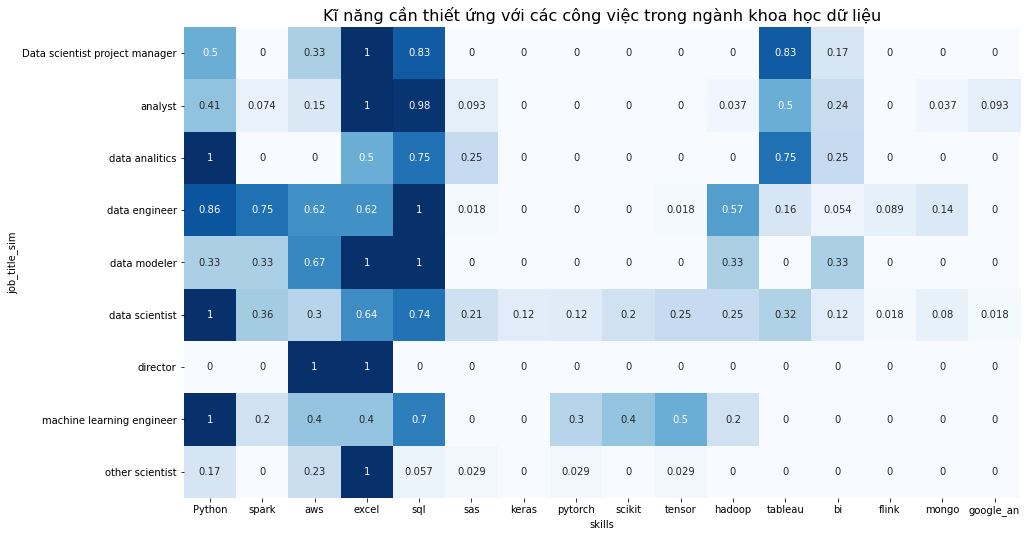

In [15]:
#Chuẩn hóa các giá trị theo max của từng hàng
job_skills_normalize = job_skills.div(job_skills.max(axis=1), axis=0)

#Vẽ biểu đồ heatmap để thể hiện
plt.figure(figsize=(15, 15))
sns.heatmap(job_skills_normalize, vmin=0, vmax=1, square=True, annot=True, cbar=False, cmap='Blues')
plt.title('Kĩ năng cần thiết ứng với các công việc trong ngành khoa học dữ liệu',size=16)
plt.xlabel('skills');

- Theo như quan sát sơ bộ thì các ngành trong lĩnh vực khoa học dữ liệu đa số đều cần các kĩ năng như **python, excel, sql** (với tỉ lệ cao nhất = 1 rất nhiều). Tuy nhiên ta cũng có thể dễ dàng theo dõi từng ngành như sau:
    - **Data analytst** thì cần nhiều nhất là python, sql, tableau,...
    - **Data engineer** thì lại cần sql, python, spark, aws, excel,hadoop
    - **Data modeler** cần excel, sql, aws,...
    - **Data scientist** cần nhiều nhất là python, sql, exel, spark,...
    -...
    
Ta thấy có rất nhiều skill về lĩnh vực khoa học dữ liệu vì vậy ta không thể nào học hết tất cả được. Do đó tùy vào ngành mình muốn theo đuổi mà mình nên học chuyên sâu tìm hiểu một số skill chính để đáp ứng yêu cầu công việc tốt nhất.

***Bên cạnh việc tìm hiểu các kĩ năng, người học cũng quan tâm rất nhiều về mức lương, vậy top các công việc có mức lương cao nhất trong lĩnh vực khoa học dữ liệu là gì?***

### Phân tích dữ liệu
Để trả lời câu hỏi, ta thực hiện các bước sau:
- Bước 1: Gom nhóm các đối tượng theo công việc(job title sim) rồi tính trung bình về mức lương.
- Bước 2: Vẽ biểu đồ barh thể hiện.

Code bước 1

In [16]:
#Gom nhóm công việc rồi tính lương trung bình, sau đó sort theo giá trị giảm dần.
job_salary_avg = ds_salary_df.groupby('job_title_sim')['Avg Salary(K)'].mean()
job_salary_avg = job_salary_avg.sort_values(ascending = False)
job_salary_avg

job_title_sim
director                          137.666667
machine learning engineer         128.045455
data scientist                    116.336493
data engineer                     102.866667
other scientist                    90.905405
data modeler                       84.000000
Data scientist project manager     74.562500
data analitics                     72.500000
analyst                            68.428571
Name: Avg Salary(K), dtype: float64

Code bước 2

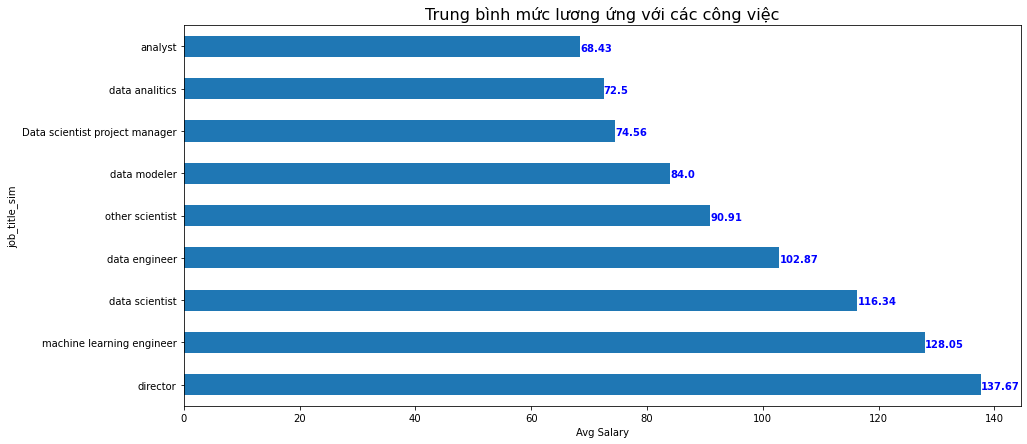

In [17]:
#Vẽ biểu đồ barh để quan sát, điền thêm các giá trị của từng cột.
plt.figure(figsize=(15, 7))
ax = job_salary_avg.plot.barh()
list_values = list(job_salary_avg.values.round(2))
for i, v in enumerate(list_values):
    ax.text(v, i - 0.1, str(v), color='blue', fontweight='bold')
plt.title('Trung bình mức lương ứng với các công việc', size=16)
plt.xlabel('Avg Salary');

Không có gì bất ngờ khi director là công việc có lương trung bình cao nhất (137,67 K$). Tiếp theo là các công việc như machine learning engineer(128,05 K), data scientist(116,34 K), ... hoặc công việc có mức lương trung bình thấp nhất là analyst, data analyst.

***Qua các phân tích ở trên ta biết được mức lương trung bình của các công việc cũng như các kĩ năng yêu cầu của các công việc này. Từ đó dễ dàng lựa chọn công việc cũng như các kĩ năng mà công việc yêu cầu để có thể tập trung chuyên sâu.***

## Câu hỏi 2:

### Tiền xử lý
- Các bước thực hiện:

In [ ]:
#Code

### Phân tích dữ liệu
- Các bước thực hiện:

In [ ]:
#Code

## 5. Nhìn lại quá trình làm đồ án

- TV1 : Những khó khăn?
        Học được gì?

- TV2: Những khó khăn?
        Học được gì?

- Nhóm: nếu có thêm thời gian thì sẽ làm gì?

## 6. Tài liệu tham khảo